In [1]:
!pip install python-dotenv

In [2]:
from dotenv import load_dotenv                # Load dotenv file into the system
import os
from os import getenv                         # Get variables from system into code
import requests                               # Use variables to make HTTP requests

In [3]:
load_dotenv()

True

In [4]:
APP_NAME = getenv('APP_NAME')
APP_ID = getenv('APP_ID')
APP_SECRET = getenv('APP_SECRET')
USERNAME = getenv('REDDIT_USERNAME')
PASSWORD = getenv('PASSWORD')

In [5]:
if APP_NAME and APP_ID and APP_SECRET and USERNAME and PASSWORD:         # Checking if any variables didn't load correctly
    print('Yes')
else:
    print('No')

Yes


In [6]:
#print(APP_SECRET)                                                        # Checking if any variable loaded correclty
#print(APP_NAME)
#print(APP_ID)
#print(USERNAME)
#print(PASSWORD)

In [7]:
#try:                                                                     # Checking for exceptions, no exceptions raised
#    load_dotenv()

#except Exception as e:
#    print(f"Error loading .env file: {e}")

In [8]:
#os.getcwd()                                                              # Checking working directory

In [9]:
#with open('.env', 'r') as file:
    #contents=file.read()
    
#print(contents)

In [10]:
#file_path="C:\\Users\\paddy\\Data Prep & Viz for Data Analytics\\.env.env"

#if os.access(file_path, os.R_OK):
 #   print('This file is readable')
#else:
#    print('This file is not readable')

In [11]:
USERNAME               # Sanity testing the variables are accessible

'poc1993'

In [12]:
!pip install praw  

In [13]:
import praw
                        
reddit=praw.Reddit(                                # Creating instance of praw.reddit class and authenticating 
    client_id=APP_ID,
    client_secret=APP_SECRET,
    user_agent=USERNAME,
)

In [14]:
import json

comment_list=[]                                   # Creating a list



subreddit=reddit.subreddit('irishpolitics')       # Choosing the subreddit 
 
comments=subreddit.comments(limit=1000)           # Downloading the comments from subreddit

for comment in comments:                          # Checking the comments
    comment_info={
        'author':str(comment.author),
        'score':comment.score,
        'body':comment.body
    }
    comment_list.append(comment_info)             # Appending comments to list

file_path="C:\\Users\\paddy\\Data Prep & Viz for Data Analytics\\.json"  

with open(file_path, 'w') as json_file:           # Export as json file
    json.dump(comment_list, json_file)
    
print('comment data saved as json file:', file_path) 

#    print('Comment author:', comment.author)
#    print('Comment score:', comment.score)
#    print('Comment body:', comment.body)

comment data saved as json file: C:\Users\paddy\Data Prep & Viz for Data Analytics\.json


In [15]:
import pandas as pd

df=pd.read_json("C:\\Users\\paddy\\Data Prep & Viz for Data Analytics\\.json")          # Read json into dataframe

df.head(5)

,author,score,body
0,PremiumTempus,1,Do you want to give the EU power in domestic a...
1,eggbart_forgetfulsea,1,"No, we're very capable of housing applicants. ..."
2,PrinceRizz23,1,That's not correct. Ireland is frequently repr...
3,SubstantialFeel,1,Fine Gael are proposing to spend a billion a y...
4,Techinstuff,1,"Lol yeah, funny that boring for a language can..."


In [16]:
df=df.rename(columns={'body': 'ireland comments'})      # Rename column with comments

df.head(5)

,author,score,ireland comments
0,PremiumTempus,1,Do you want to give the EU power in domestic a...
1,eggbart_forgetfulsea,1,"No, we're very capable of housing applicants. ..."
2,PrinceRizz23,1,That's not correct. Ireland is frequently repr...
3,SubstantialFeel,1,Fine Gael are proposing to spend a billion a y...
4,Techinstuff,1,"Lol yeah, funny that boring for a language can..."


In [17]:
comment_list=[]                                       # Creating a list



subreddit=reddit.subreddit('News_Construction')       # Choosing the subreddit 
 
comments=subreddit.comments(limit=1000)               # Downloading the comments from subreddit

for comment in comments:                              # Checking the comments
    comment_info={
        'author':str(comment.author),
        'score':comment.score,
        'body':comment.body
    }
    comment_list.append(comment_info)                # Appending comments to list

file_path="C:\\Users\\paddy\\Data Prep & Viz for Data Analytics\\.json"  

with open(file_path, 'w') as json_file:              # Export as json file
    json.dump(comment_list, json_file)
    
print('comment data saved as json file:', file_path) 

comment data saved as json file: C:\Users\paddy\Data Prep & Viz for Data Analytics\.json


In [18]:
df_2=pd.read_json("C:\\Users\\paddy\\Data Prep & Viz for Data Analytics\\.json")   # Reading in second json file

df_2.head(5)

,author,score,body
0,clydejs620,1,The construction industry has been concerned a...
1,Individual_Corgi5670,1,He dies
2,IndustrialProperties,1,Commercial Real estate intended to make a prof...
3,bayremodelingkb,1,Excellent
4,PreXLR,1,"(Hi|Hey|Hello) OP,"


In [19]:
df_2=df_2.rename(columns={'body': 'Other comments'})           # Rename column for clarity

df_2.head(5)

,author,score,Other comments
0,clydejs620,1,The construction industry has been concerned a...
1,Individual_Corgi5670,1,He dies
2,IndustrialProperties,1,Commercial Real estate intended to make a prof...
3,bayremodelingkb,1,Excellent
4,PreXLR,1,"(Hi|Hey|Hello) OP,"


In [20]:
new_df=pd.concat([df, df_2], axis=1)                          # Concatenate the two dataframes together into one

new_df.head(5)

,author,score,ireland comments,author,score,Other comments
0,PremiumTempus,1,Do you want to give the EU power in domestic a...,clydejs620,1.0,The construction industry has been concerned a...
1,eggbart_forgetfulsea,1,"No, we're very capable of housing applicants. ...",Individual_Corgi5670,1.0,He dies
2,PrinceRizz23,1,That's not correct. Ireland is frequently repr...,IndustrialProperties,1.0,Commercial Real estate intended to make a prof...
3,SubstantialFeel,1,Fine Gael are proposing to spend a billion a y...,bayremodelingkb,1.0,Excellent
4,Techinstuff,1,"Lol yeah, funny that boring for a language can...",PreXLR,1.0,"(Hi|Hey|Hello) OP,"


In [21]:
new_df=new_df.drop(columns=['author', 'score', 'author', 'score'])     # Drop unnecessary columns

new_df.head(5)

,ireland comments,Other comments
0,Do you want to give the EU power in domestic a...,The construction industry has been concerned a...
1,"No, we're very capable of housing applicants. ...",He dies
2,That's not correct. Ireland is frequently repr...,Commercial Real estate intended to make a prof...
3,Fine Gael are proposing to spend a billion a y...,Excellent
4,"Lol yeah, funny that boring for a language can...","(Hi|Hey|Hello) OP,"


In [29]:
new_df.info()                                                          # Checking for null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 916
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ireland comments   917 non-null    object 
 1   Other comments     917 non-null    object 
 2   Sentiment_ireland  917 non-null    float64
 3   Sentiment_other    917 non-null    float64
 4   ireland label      917 non-null    object 
 5   other label        917 non-null    object 
dtypes: float64(2), object(4)
memory usage: 50.1+ KB


In [22]:
new_df.dropna(inplace=True)                     # Dropped rows with null values as part of Complete Case Analysis (CCA)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 916
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ireland comments  917 non-null    object
 1   Other comments    917 non-null    object
dtypes: object(2)
memory usage: 21.5+ KB


In [23]:
from textblob import TextBlob           # Importing library for sentiment analysis

new_df['Sentiment_ireland']=new_df['ireland comments'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Assigning polarity score

new_df['Sentiment_other']=new_df['Other comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity) # Assigning polarity score

new_df.head(5)

,ireland comments,Other comments,Sentiment_ireland,Sentiment_other
0,Do you want to give the EU power in domestic a...,The construction industry has been concerned a...,0.166667,0.294872
1,"No, we're very capable of housing applicants. ...",He dies,0.211667,0.000000
2,That's not correct. Ireland is frequently repr...,Commercial Real estate intended to make a prof...,0.050000,0.128571
3,Fine Gael are proposing to spend a billion a y...,Excellent,-0.127778,1.000000
4,"Lol yeah, funny that boring for a language can...","(Hi|Hey|Hello) OP,",0.016667,0.000000


In [24]:
print(new_df.dtypes)                     # Checking data types

ireland comments      object
Other comments        object
Sentiment_ireland    float64
Sentiment_other      float64
dtype: object


In [25]:
def get_sentiment_label(score):         # Assigning labels 'positive', 'negative' and 'neutral' to Ireland sentiment scores
    if score>0.5:
        return 'positive'
    elif score<-0.5:
        return 'negative'
    else:
        return 'neutral'
    
new_df['ireland label']=new_df['Sentiment_ireland'].apply(get_sentiment_label)


new_df.head(5)

,ireland comments,Other comments,Sentiment_ireland,Sentiment_other,ireland label
0,Do you want to give the EU power in domestic a...,The construction industry has been concerned a...,0.166667,0.294872,neutral
1,"No, we're very capable of housing applicants. ...",He dies,0.211667,0.000000,neutral
2,That's not correct. Ireland is frequently repr...,Commercial Real estate intended to make a prof...,0.050000,0.128571,neutral
3,Fine Gael are proposing to spend a billion a y...,Excellent,-0.127778,1.000000,neutral
4,"Lol yeah, funny that boring for a language can...","(Hi|Hey|Hello) OP,",0.016667,0.000000,neutral


In [26]:
new_df['other label']=new_df['Sentiment_other'].apply(get_sentiment_label) # Assigning labels 'positive', 'negative' and 'neutral' to other sentiment scores


new_df.head(5)

,ireland comments,Other comments,Sentiment_ireland,Sentiment_other,ireland label,other label
0,Do you want to give the EU power in domestic a...,The construction industry has been concerned a...,0.166667,0.294872,neutral,neutral
1,"No, we're very capable of housing applicants. ...",He dies,0.211667,0.000000,neutral,neutral
2,That's not correct. Ireland is frequently repr...,Commercial Real estate intended to make a prof...,0.050000,0.128571,neutral,neutral
3,Fine Gael are proposing to spend a billion a y...,Excellent,-0.127778,1.000000,neutral,positive
4,"Lol yeah, funny that boring for a language can...","(Hi|Hey|Hello) OP,",0.016667,0.000000,neutral,neutral


<function matplotlib.pyplot.show(close=None, block=None)>

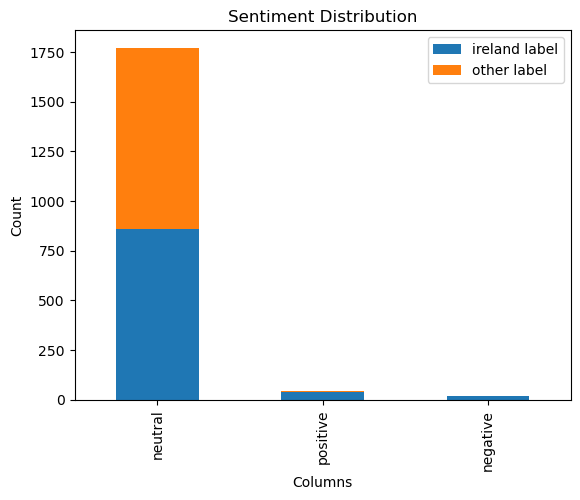

In [27]:
import matplotlib.pyplot as plt           # Plotting the sentiment distribution for Ireland and other, mostly neutral

sentiment_counts=new_df[['ireland label', 'other label']].apply(pd.Series.value_counts) # Counting number of positive, negative and neutral labels

sentiment_counts.plot(kind='bar', stacked=True) # Stacked to combine data from both columns in counts for comparative view

plt.title('Sentiment Distribution')
plt.xlabel('Columns')
plt.ylabel('Count')

plt.show